# 🍷 Avaliação de Qualidade de Vinhos

## Objetivo

Este projeto realiza uma Análise Exploratória de Dados (EDA) no dataset de qualidade de vinhos tintos, que contém 11 características físico-químicas (como `alcohol`, `volatile acidity` e `pH`) e uma nota de qualidade (`quality`). O objetivo é entender as distribuições dessas variáveis, identificar padrões e explorar suas relações com a qualidade, gerando insights valiosos sobre o que pode influenciar o sabor dos vinhos. Embora não haja um modelo de Machine Learning neste estudo, a análise visa preparar uma base sólida — resultando em `vinhos_alterado` — pra futuros projetos preditivos, além de oferecer conclusões práticas pra estratégias de produção ou avaliação sensorial.

## 1. 🔎 Preparação para Análise

### Importação de Blibliotecas

In [6]:
# Importing essential libraries for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting Seaborn default style for better visualizations
sns.set()

### Leitura de Dados

In [8]:
# Loading the Wine Quality dataset
df = pd.read_csv("winequality-red.csv")

In [9]:
# Displaying basic data overview
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Checking the dataset dimensions (rows, columns)
df.shape

(1599, 12)

Quase 1600 linhas e 12 colunas

## 2. 🧪 Análise de Dados

### Informações básicas

Vamos verificar os tipos de dados de cada coluna agora

In [15]:
# Displaying information about the dataset (data types, non-null counts, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Ótimo! Todos os dados são numéricos e não nulos, facilitando as análises e visualização prática das distribuições e estatísticas.

Antes de seguir para o tratamento de dados, vamos verificar alguns dados importantes do dataset:

In [18]:
# Generating statistical summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Algumas colunas apresentam valores bem discrepantes em relação a outras. Isso fica evidente ao observar o desvio padrão (`std`), que indica maior variação em certas variáveis, e ao comparar a média com a mediana, onde diferenças significativas sugerem distribuições assimétricas.

Esses sinais apontam para a possível necessidade de normalização dos dados, especialmente se forem usados em modelos de Machine Learning sensíveis à escala, como SVM ou KNN.

### Correlação entre variáveis

In [22]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

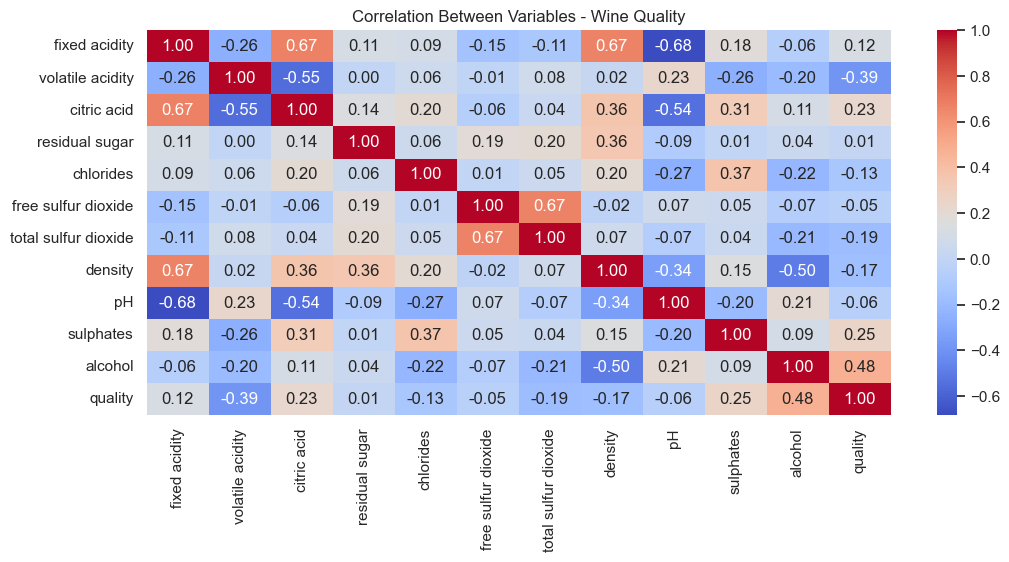

In [23]:
# Creating a heatmap to visualize correlations
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Variables - Wine Quality")
plt.show()

Ao examinar o heatmap, observamos algumas correlações relativamente altas entre variáveis, como entre acidez (`fixed acidity`) e densidade (`density`), com valores próximos de 0.67 e 0.68.

Embora o limite típico para forte correlação seja acima de 0.7, essas magnitudes justificam uma análise mais detalhada dessas variáveis, pois podem influenciar modelos de Machine Learning. Vamos prosseguir agora verificando a presença de dados duplicados no dataset.

### Dados Duplicados

In [27]:
# Checking for duplicated rows
duplicate_count = df.duplicated().sum()

Identificamos 240 registros duplicados no dataset de vinhos, que contém 1.599 amostras no total. Isso representa cerca de 15% dos dados (240/1599).

Embora a remoção de duplicatas seja comum em análises exploratórias para evitar viés, esse percentual é significativo. Considerando o contexto do dataset — medições físico-químicas de vinhos — duplicatas podem refletir amostras reais com valores idênticos, não necessariamente erros.

Porém, como não temos como comprovar se são diferentes vinhos com as mesmas medidas (já que não há uma tabela com nomes de vinhos pra verificar), vamos assumir que são erros e removê-las. Para o propósito deste EDA, essa decisão deve ser monitorada, avaliando seu impacto nos resultados.

### Outliers

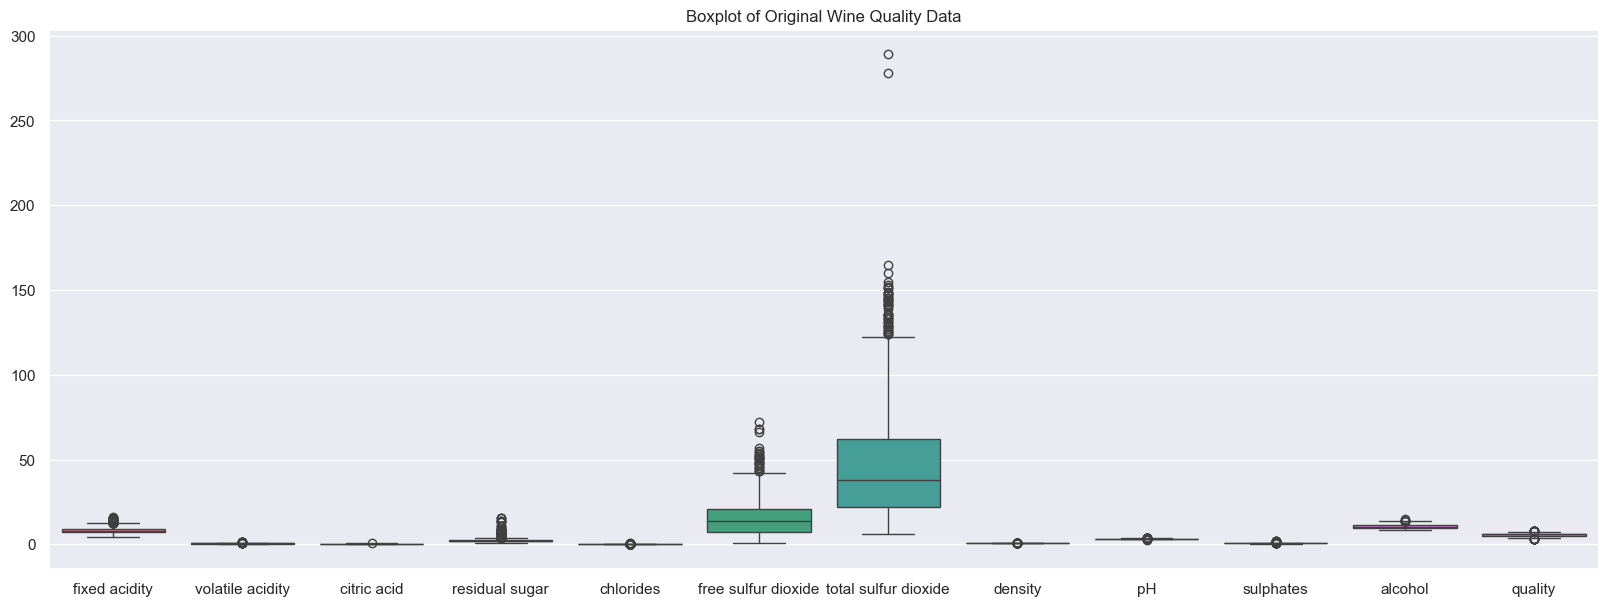

In [32]:
# Visualizing boxplots for all features to detect outliers
plt.figure(figsize=(20, 7))
sns.boxplot(data=df)
plt.title("Boxplot of Original Wine Quality Data")
plt.show()

Ao tentar visualizar os outliers com um boxplot de todas as variáveis, percebemos que as magnitudes muito discrepantes entre as colunas dificultam a leitura num único gráfico. 

Isso reflete as variações já notadas no `describe()`. Pra contornar isso, vamos normalizar os dados antes de visualizar.

In [35]:
# Normalizing data using Z-score (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Creating a new DataFrame with scaled data to observe changes
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Vamos verificar o resultado com `.head()`

In [37]:
# Displaying the first few rows of the scaled dataset
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


Perfeito! Agora só visualizar o gráfico de caixa novamente:

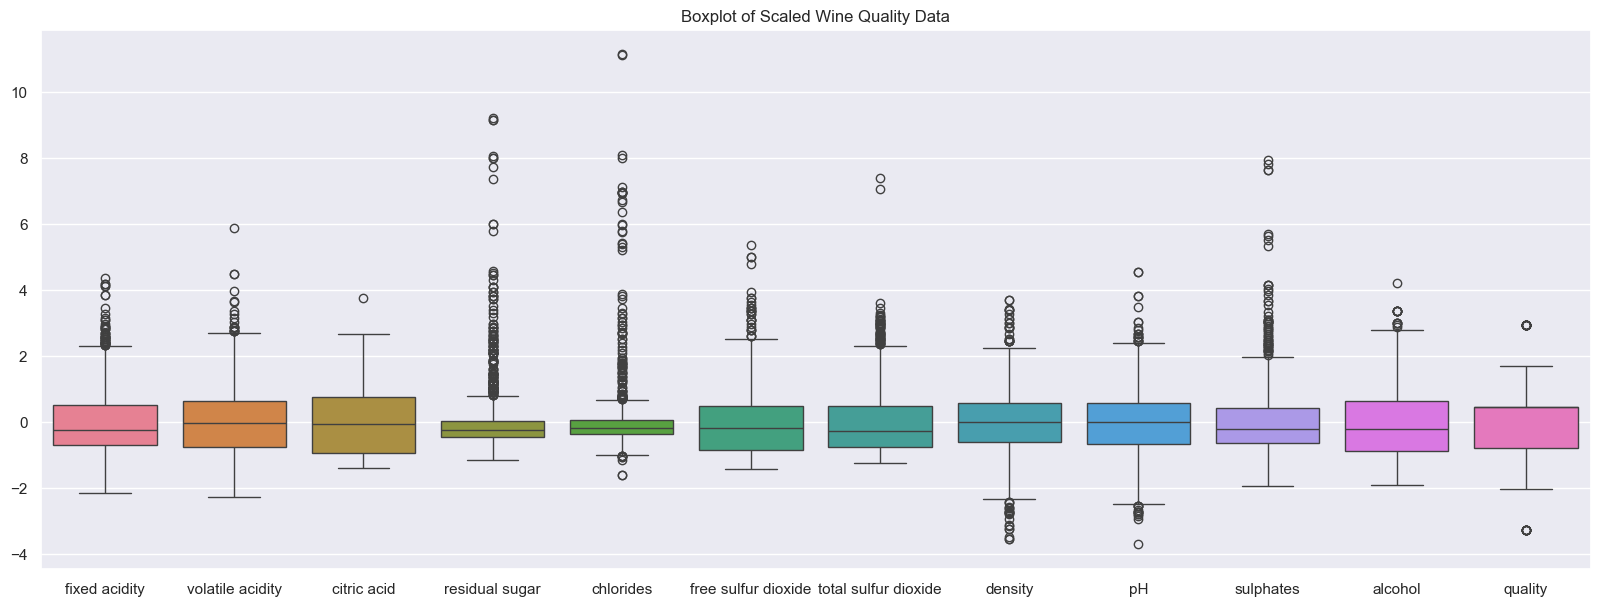

In [39]:
# Visualizing boxplots for scaled data
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_scaled)
plt.title("Boxplot of Scaled Wine Quality Data")
plt.show()

Os dados revelam múltiplos outliers em várias variáveis independentes, como `residual sugar` e `chlorides`, indicando alta variabilidade — algo esperado em medições de vinhos.

Essa discrepância é típica do dataset, mas pode dificultar a identificação de padrões claros. Para aprimorar a análise e facilitar insights, optamos por aplicar uma transformação logarítmica nas variáveis.

In [42]:
# Applying log transformation to the original data (log1p handles zero values)
df_transformed = np.log1p(df)

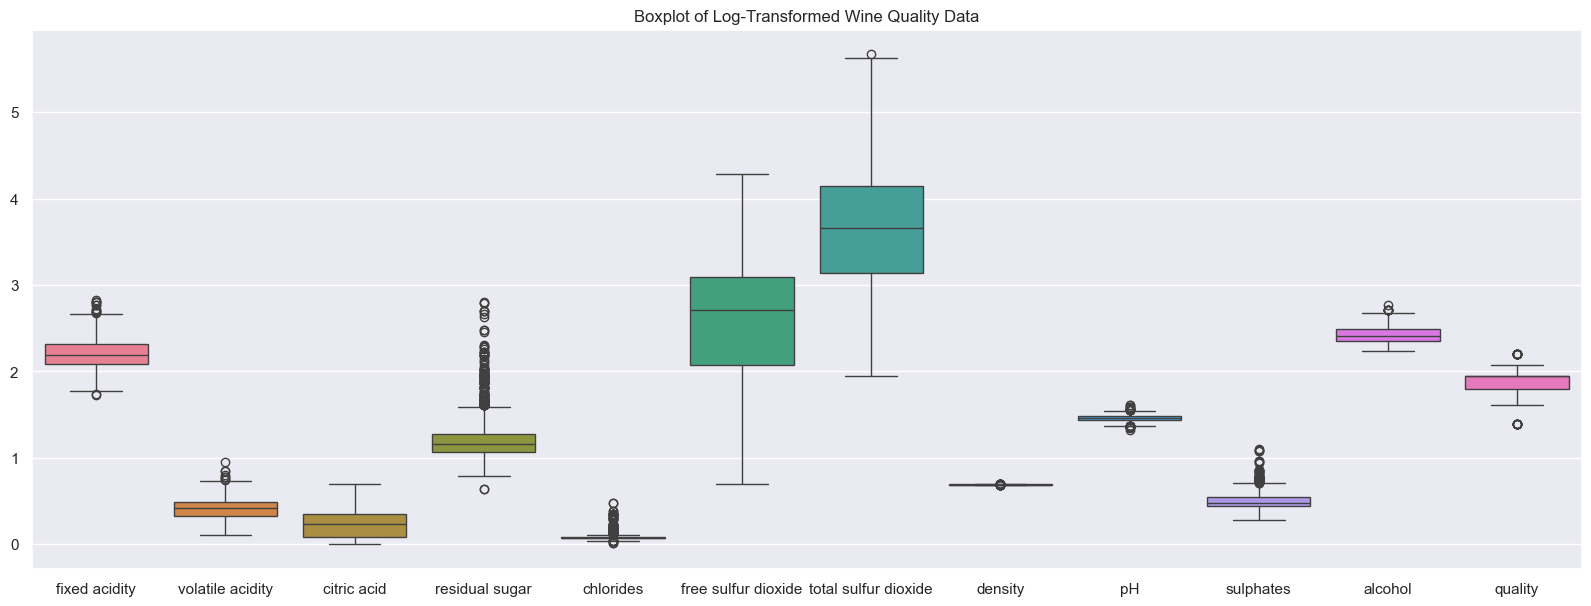

In [43]:
# Visualizing boxplots for log-transformed data
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_transformed)
plt.title("Boxplot of Log-Transformed Wine Quality Data")
plt.show()

Com a transformação logarítmica aplicada via `np.log1p()` em todo o dataset, conseguimos uma distribuição mais suave e adequada, reduzindo o impacto dos outliers e melhorando a visualização para análise.

Algumas variáveis, como `total sulfur dioxide`, naturalmente possuem muitos outliers como parte de suas características, e decidimos mantê-los assim. Para preservar a integridade da coluna `quality`, que é nosso alvo original, revertemos sua transformação, mantendo os valores brutos essenciais para futuros passos, como Machine Learning.

In [46]:
# Restoring the original 'quality' column to the transformed dataset
df_transformed['quality'] = df['quality']

## 3. 🩺 Tratamento de Dados

Agora vamos seguir para o tratamento de dados separando em dois arquivos, dessa forma conseguiremos visualizar os impactos de nossas alterações em análises futuras e em possíveis insights.

Lembrando das informações e alterações feitas na seção anterior:

1. Correlação alta (mínimo 0.67) entre algumas variáveis.

2. 240 duplicatas (15% do total).

3. Outliers mantidos, valores normalizados com transformação logarítmica

### Correlação entre variáveis

Na análise exploratória, identificamos algumas correlações moderadas entre as variáveis independentes:  
- `fixed acidity` e `citric acid`: 0.67  
- `fixed acidity` e `density`: 0.67  
- `fixed acidity` e `pH`: -0.68  
- `free sulfur dioxide` e `total sulfur dioxide`: 0.67  

O tratamento de correlações é mais comum em Machine Learning, especialmente pra algoritmos sensíveis como SVM ou regressões lineares, onde multicolinearidade pode afetar o desempenho. Como nosso foco aqui é explorar os dados, optamos por apenas listar essas relações. Elas serão úteis pra guiar insights futuros e ajustes em etapas de modelagem, caso necessário.

### Dados duplicados

Agora, vamos remover os 240 dados duplicados identificados (15% do total) e salvar o resultado em `vinhos_alterado`.

Isso nos permitirá comparar os dados tratados com o dataset original posteriormente, avaliando o impacto dessa limpeza na análise e em futuros passos de Machine Learning.

In [59]:
# Removing duplicates from the transformed dataset
df_transformed.drop_duplicates(inplace=True)

In [60]:
# Confirming duplicate removal
duplicate_count_transformed = df_transformed.duplicated().sum()

Finalizamos o tratamento básico de dados em `vinhos_alterado`, removendo duplicatas e ajustando outliers com transformação logarítmica. Com isso, os dados estão preparados pra maximizar a geração de insights valiosos na próxima etapa.

Vamos agora explorar os padrões e tirar conclusões úteis pra análise exploratória.

## 4. 💡 Gerando Insights

Primeiro vamos analisar dois heatmaps para ver a associação das variáveis com a qualidade dos vinhos:

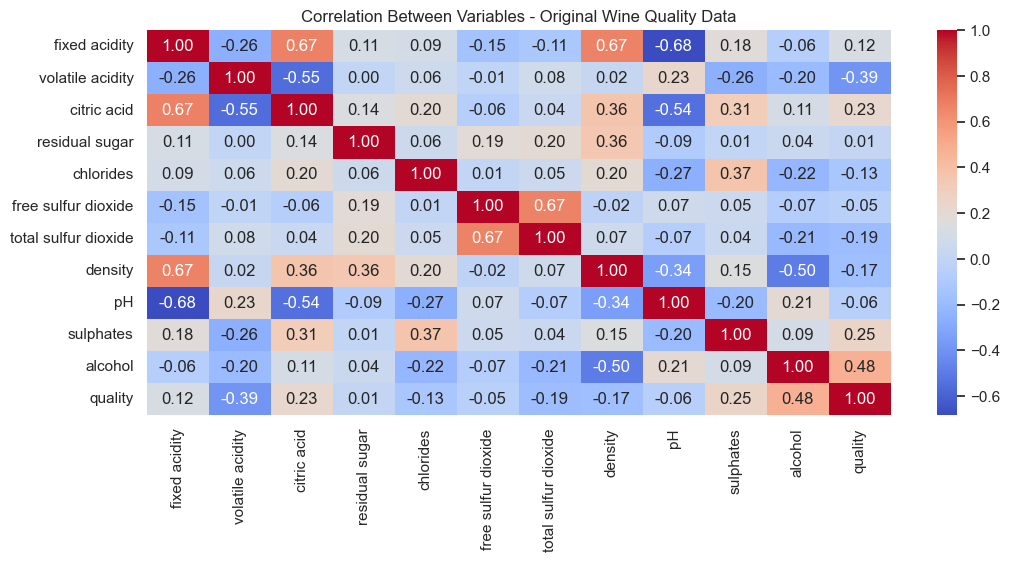

In [65]:
# Heatmap for original data (recomputed for clarity)
correlation_original = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_original, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Variables - Original Wine Quality Data")
plt.show()

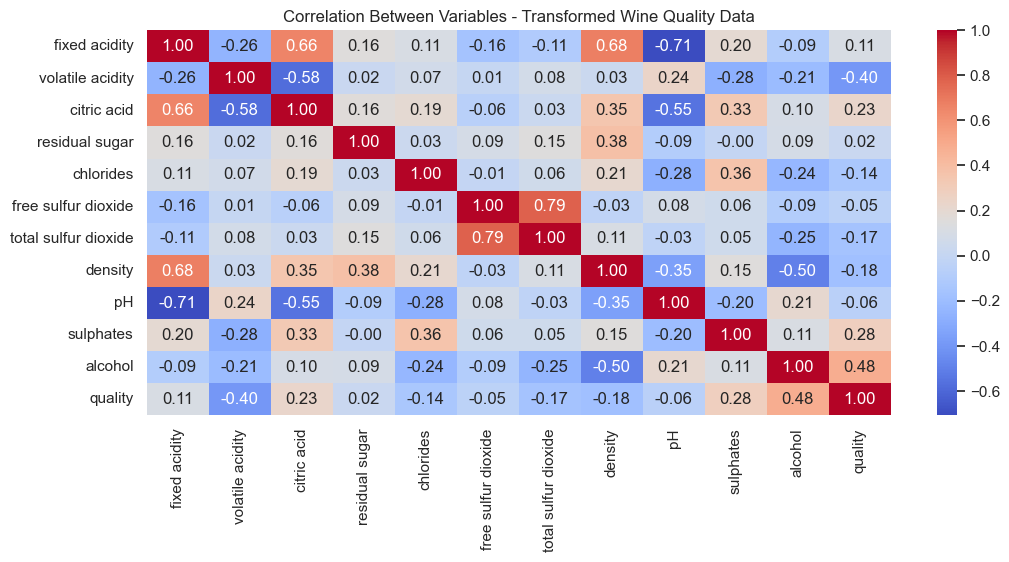

In [66]:
# Heatmap for transformed data
correlation_transformed = df_transformed.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_transformed, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Variables - Transformed Wine Quality Data")
plt.show()

Com o tratamento dos dados em `vinhos_alterado`, as associações entre as variáveis ficaram mais evidentes. Nosso objetivo nesta etapa é analisar a linha de `quality` na matriz de correlação e entender como as outras variáveis se relacionam com ela. Observamos os seguintes padrões:

1. Menores níveis de acidez volátil (`volatile acidity`) estão associados a uma queda na qualidade.  
2. Um maior teor alcoólico (`alcohol`) indica uma tendência de aumento na qualidade.  
3. Valores mais altos de ácido cítrico (`citric acid`) e sulfatos (`sulphates`) acompanham moderadamente uma melhoria na qualidade.  

As correlações analisadas, porém, não são suficientemente fortes (valores abaixo de 0.7), sugerindo que a relação entre essas variáveis e `quality` é perceptível, mas não dominante. Isso aponta que outros fatores podem influenciar a qualidade dos vinhos, além das associações identificadas.

#### Exploração visual com gráficos

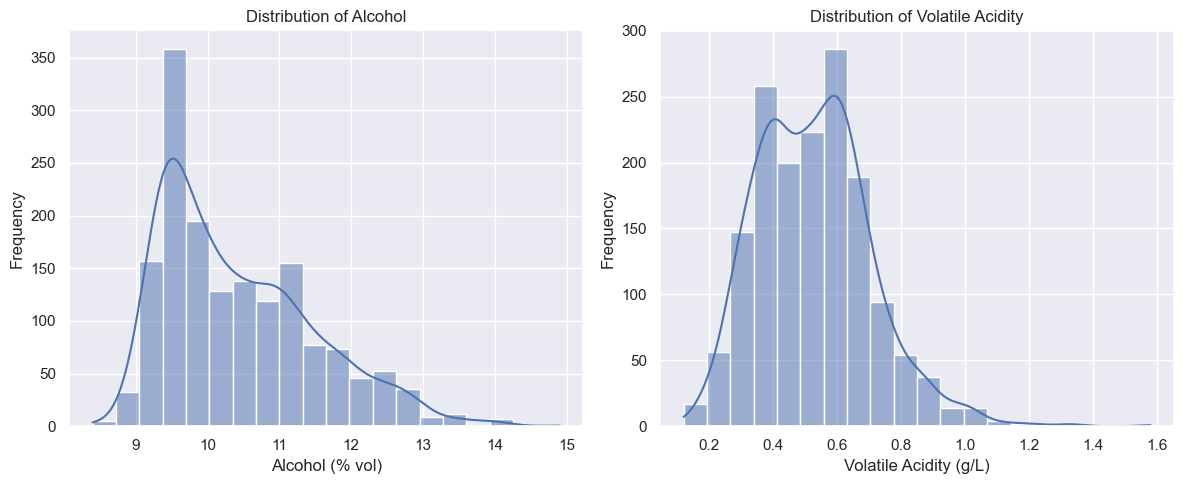

In [71]:
# Creating a figure with two side-by-side subplots for histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Alcohol with KDE
sns.histplot(df['alcohol'], bins=20, kde=True, ax=ax1)
ax1.set_title("Distribution of Alcohol")
ax1.set_xlabel("Alcohol (% vol)")
ax1.set_ylabel("Frequency")

# Histogram for Volatile Acidity with KDE
sns.histplot(df['volatile acidity'], bins=20, kde=True, ax=ax2)
ax2.set_title("Distribution of Volatile Acidity")
ax2.set_xlabel("Volatile Acidity (g/L)")
ax2.set_ylabel("Frequency")

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

Os histogramas mostram que a maioria dos vinhos tem entre 9 e 11% de teor alcoólico em `alcohol`, enquanto a distribuição de `volatile acidity` é mais concentrada, indicando menor variabilidade nos níveis de acidez. Agora, vamos analisar como essas variáveis se relacionam com `quality` nos gráficos de dispersão, buscando padrões mais claros nos dados tratados.

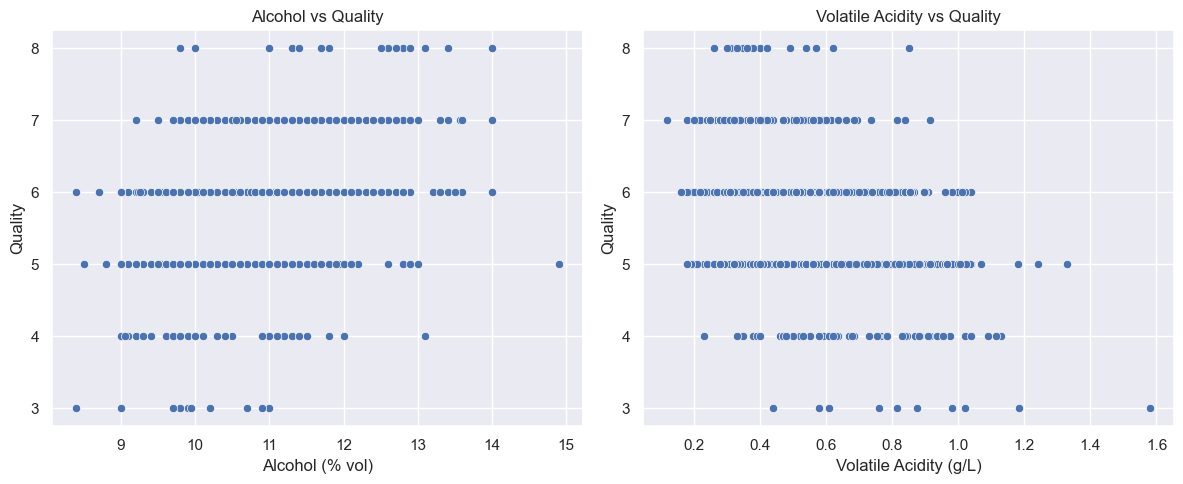

In [73]:
# Creating a figure with two side-by-side subplots for scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Alcohol vs. Quality
sns.scatterplot(x='alcohol', y='quality', data=df, ax=ax1)
ax1.set_title("Alcohol vs Quality")
ax1.set_xlabel("Alcohol (% vol)")
ax1.set_ylabel("Quality")

# Scatter plot for Volatile Acidity vs. Quality
sns.scatterplot(x='volatile acidity', y='quality', data=df, ax=ax2)
ax2.set_title("Volatile Acidity vs Quality")
ax2.set_xlabel("Volatile Acidity (g/L)")
ax2.set_ylabel("Quality")

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

Os gráficos de dispersão permitiram explorar melhor as relações entre `alcohol`, `volatile acidity` e `quality`. Observamos que:

1. Um maior teor alcoólico (`alcohol`) está associado a uma melhora na qualidade, embora a correlação (0.48 no heatmap) não seja forte o suficiente pra indicar uma relação direta e dominante.  
2. Para `volatile acidity`, a tendência é mais evidente: menores níveis de acidez coincidem com vinhos de qualidade superior, beneficiados pela distribuição mais agrupada da variável (0.2-1.0 g/L).  
3. A maioria dos vinhos concentra-se entre 9 e 11% de `alcohol`, com poucos acima de 13%, sugerindo que alta alcoolemia é rara, mas possivelmente ligada a vinhos de destaque.  
4. Embora algumas variáveis, como `alcohol` e `volatile acidity`, mostrem correlações moderadas com `quality` (0.48 e -0.40, respectivamente), essas associações não são suficientemente fortes pra determinar um impacto decisivo, indicando a influência de outros fatores no sabor.

Visualizar os gráficos lado a lado destaca um comportamento complementar: enquanto `alcohol` tende a aumentar com a qualidade, `volatile acidity` diminui, oferecendo pistas sobre o equilíbrio químico que favorece vinhos melhores.

## 5. 📑 Conclusões

Após o tratamento em `vinhos_alterado`, conseguimos explorar com mais clareza as distribuições, correlações e influências das variáveis no dataset de vinhos. Métodos como a transformação logarítmica, embora mais comuns em preparação pra Machine Learning, foram úteis na EDA ao suavizar outliers e revelar padrões que não estavam tão evidentes inicialmente, como o comportamento de `volatile acidity`. 

A remoção de duplicatas (240 registros, 15% do total) também aprimorou o heatmap, destacando melhor as relações entre variáveis. Essa etapa, porém, exige cautela: sem identificadores únicos dos vinhos, presumimos que eram erros, mas em outros casos é essencial verificar se duplicatas refletem dados válidos.

Para os insights visuais, optamos por usar `vinhos` nos histogramas, preservando os valores reais (ex.: % de `alcohol`, g/L de `volatile acidity`). Isso gerou conclusões práticas, como a tendência de maior qualidade com teores alcoólicos mais altos (acima de 11%) e menor acidez volátil (abaixo de 0.8 g/L). Embora as correlações (ex.: 0.48 pra `alcohol`, -0.40 pra `volatile acidity`) não sejam fortes o suficiente pra explicar completamente a qualidade, elas sugerem um equilíbrio químico que pode orientar estratégias de produção ou análises futuras.

Com `vinhos_alterado` pronto — sem duplicatas e com outliers ajustados —, temos uma base sólida pra projetos de Machine Learning, caso o objetivo evolua pra previsão de qualidade ou sabor.